# Praca domowa 7 - Bonus
### Martyna Majchrzak

## Dane

W pliku 'signal.tcv' znajdują się 4 sygnały, które zostały zaburzone poprzez kombinację liniową ze sobą nawzajem.

In [70]:
import pandas as pd
import seaborn as sb
signals = pd.read_csv('..\\..\\signals.tsv', sep="\t")
signals.head()

,time,signal1,signal2,signal3,signal4
0,0,0.493428,0.078710,-1.314636,1.193460
1,1,0.524618,0.791259,-1.321386,-0.075256
2,2,-0.024396,1.064251,-1.582284,0.785229
3,3,0.219586,1.007421,-1.481651,0.193773
4,4,0.426865,0.943133,-1.521795,-0.433458


In [71]:
time=signals['time']
signals=signals.drop('time', 1)

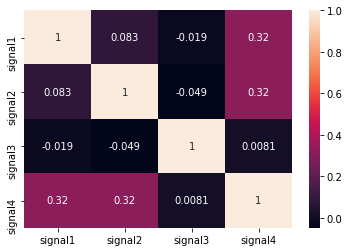

In [65]:
sb.heatmap(signals.corr(), annot=True)

Kolumna signal4 jest znacznie skorelowana z kolumną signal1 i signal2.

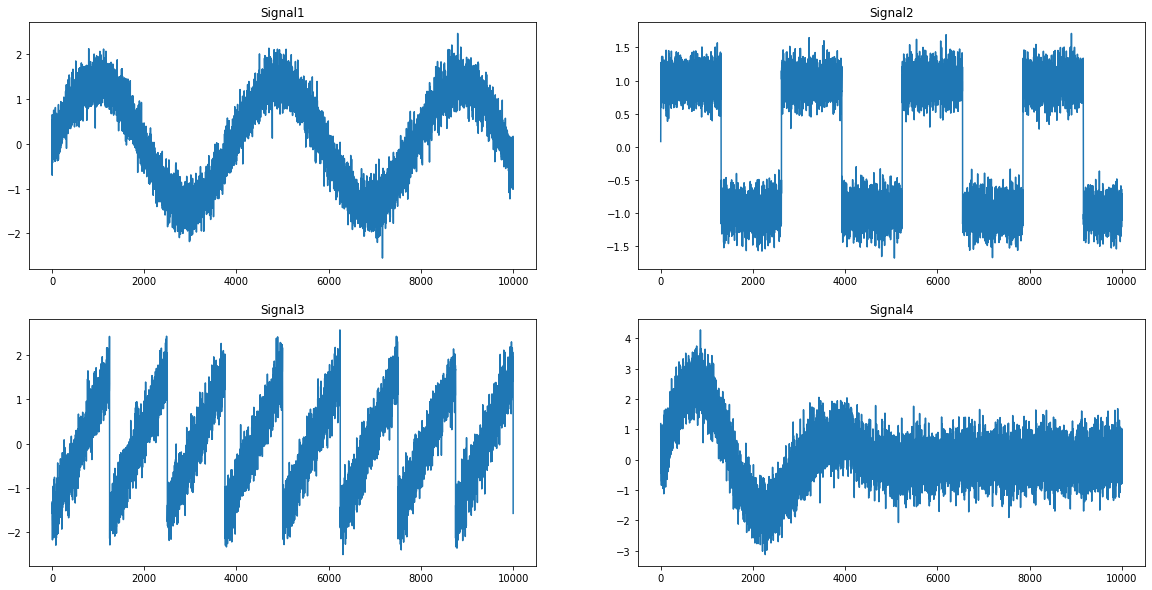

In [97]:
import matplotlib.pyplot as plt

f, axs = plt.subplots(2, 2, figsize=(20,10))

axs[0,0].plot(time, signals[signals.columns[0]])
axs[0,0].set_title('Signal1')
axs[0,1].plot(time, signals[signals.columns[1]])
axs[0,1].set_title('Signal2')
axs[1,0].plot(time, signals[signals.columns[2]])
axs[1,0].set_title('Signal3')
axs[1,1].plot(time, signals[signals.columns[3]])
axs[1,1].set_title('Signal4')

plt.show()

Powyżej zauważona zależność jest widoczna na wykresie - zmienna signal4 odbiera kształtem od pozostałych, jest o wiele mniej regularna.

## FastICA

Rozdzielimy sygnały tak, aby uzyskać oryginalne obserwacje za pomocą Independent Component Analysis.

In [66]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=4, random_state=0)
signals_ica = ica.fit_transform(signals)
original_signals=pd.DataFrame(signals_ica)
original_signals.head()

,0,1,2,3
0,0.006583,0.010363,0.000559,-0.012210
1,0.003032,-0.006077,0.006984,-0.012819
2,-0.000099,0.005379,0.010290,-0.015385
3,0.000745,-0.002199,0.009358,-0.014498
4,0.001323,-0.009859,0.008336,-0.015063


In [67]:
original_signals.columns = ['orig_sig1', 'orig_sig2', 'orig_sig3', 'orig_sig4']

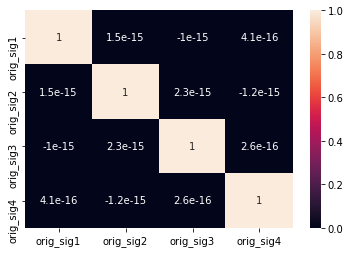

In [68]:
sb.heatmap(original_signals.corr(), annot=True)

Po wykonaniu algorytmu FastICA zmienne przestają być skorelowane.

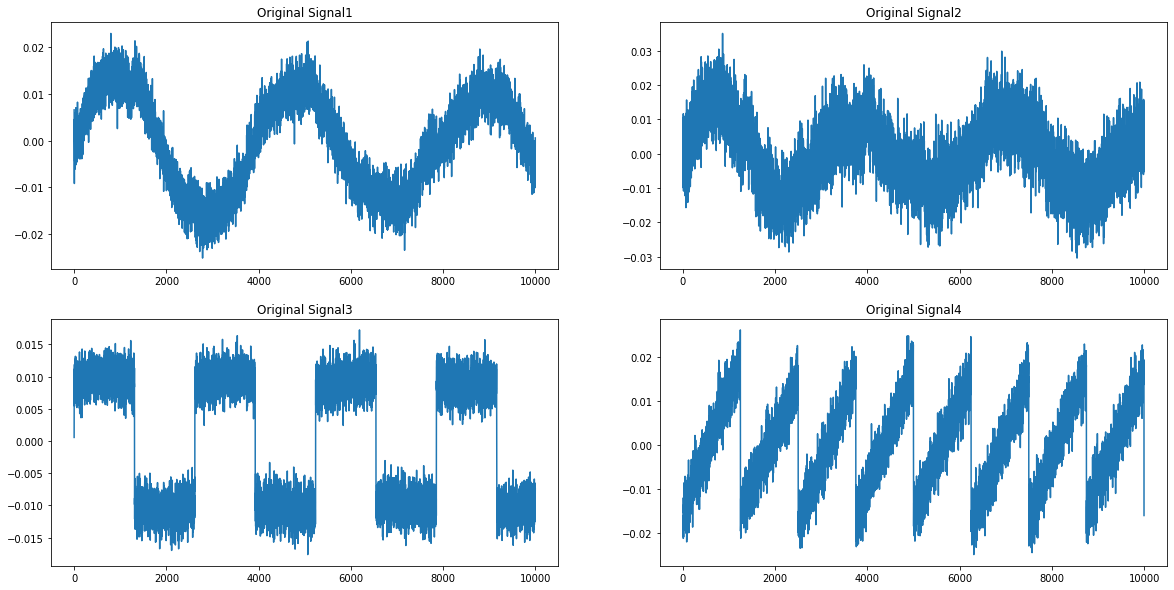

In [99]:
import matplotlib.pyplot as plt

f, axs = plt.subplots(2, 2, figsize=(20,10))
plt.title('Signals')

orig_cols=original_signals.columns
axs[0,0].plot(time, original_signals[orig_cols[0]])
axs[0,0].set_title('Original Signal1')
axs[0,1].plot(time, original_signals[orig_cols[1]])
axs[0,1].set_title('Original Signal2')
axs[1,0].plot(time, original_signals[orig_cols[2]])
axs[1,0].set_title('Original Signal3')
axs[1,1].plot(time, original_signals[orig_cols[3]])
axs[1,1].set_title('Original Signal4')


plt.show()

Z wykresów można się domyślić, że Sygnały pobrane w pliku powstały przede wszystkim z:
    
    1. Signal 1 - Original Signal 1
    2. Signal 2 - Original Signal 3
    3. Signal 3 - Original Signal 4
    4. Signal 4 - Original Signal 2, został najbardziej zaburzony poprzez kombinacje liniową z innymi sygnałami, zwłaszcza Original Signal 1 i 3